# Credit Risk Model

## Step 1 - Importing necessary libraries and data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load datasets
applications = pd.read_csv("applications_base.csv")
bureau = pd.read_csv("bureau.csv")


In [3]:
# Display initial rows of the datasets
print("Applications Dataset:")
print(applications.head())
print("\nBureau Dataset:")
print(bureau.head())

Applications Dataset:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...         

In [4]:
#printing diamensions of the datasets imported
print(applications.shape)
print(bureau.shape)

(307511, 122)
(1716428, 17)


## Step 2 - Data Processing

In [5]:
# Check for missing values
print("\nMissing Values in Applications Dataset:")
print(applications.isnull().sum()/len(applications)*100)
print("\nMissing Values in Bureau Dataset:")
print(bureau.isnull().sum()/len(bureau)*100)


Missing Values in Applications Dataset:
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

Missing Values in Bureau Dataset:
SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT    

In [6]:
# Calculate the percentage of missing values in each column for the applications table
missing_values = applications.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(applications)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print(missing_df[missing_df["Missing Values"] > 0])

                          Missing Values  Percentage
COMMONAREA_MEDI                   214865   69.872297
COMMONAREA_AVG                    214865   69.872297
COMMONAREA_MODE                   214865   69.872297
NONLIVINGAPARTMENTS_MODE          213514   69.432963
NONLIVINGAPARTMENTS_AVG           213514   69.432963
...                                  ...         ...
EXT_SOURCE_2                         660    0.214626
AMT_GOODS_PRICE                      278    0.090403
AMT_ANNUITY                           12    0.003902
CNT_FAM_MEMBERS                        2    0.000650
DAYS_LAST_PHONE_CHANGE                 1    0.000325

[67 rows x 2 columns]


In [7]:
# Calculate the percentage of missing values in each column for the bureau table
missing_values = bureau.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(bureau)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print(missing_df[missing_df["Missing Values"] > 0])

                        Missing Values  Percentage
AMT_ANNUITY                    1226791   71.473490
AMT_CREDIT_MAX_OVERDUE         1124488   65.513264
DAYS_ENDDATE_FACT               633653   36.916958
AMT_CREDIT_SUM_LIMIT            591780   34.477415
AMT_CREDIT_SUM_DEBT             257669   15.011932
DAYS_CREDIT_ENDDATE             105553    6.149573
AMT_CREDIT_SUM                      13    0.000757


In [8]:
# Handling missing values in Applications Dataset
applications = applications.loc[:, applications.isnull().mean() <= 0.3]

In [9]:
(applications.isnull().mean() * 100).sort_values(ascending=False)

EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
Length: 72, dtype: float64

In [10]:
#deleting unnecessary features
cols_to_drop = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']
applications.drop(columns=cols_to_drop, inplace=True)

In [11]:
#dropping null records
applications=applications.dropna()

In [12]:
(applications.isnull().mean() * 100).sort_values(ascending=False)

SK_ID_CURR                     0.0
FLAG_DOCUMENT_5                0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
                              ... 
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
FLAG_DOCUMENT_21               0.0
Length: 66, dtype: float64

##### Handling missing values in Bureau

In [13]:
# Handling missing values in Bureau Dataset
num_cols_bureau = bureau.select_dtypes(include=[np.number]).columns

In [14]:
for col in num_cols_bureau:
    missing_ratio = bureau[col].isnull().mean() * 100
    if missing_ratio < 20:
        bureau[col].fillna(bureau[col].median(), inplace=True)
    elif col in ['AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE']:
        bureau[col].fillna(bureau[col].median(), inplace=True)
    elif 'AMT' in col:
        bureau[col].fillna(0, inplace=True)
    else:
        bureau[col].fillna(bureau[col].median(), inplace=True)

In [15]:
# Handling categorical missing values
cat_cols_bureau = bureau.select_dtypes(include=['object']).columns
for col in cat_cols_bureau:
    bureau[col].fillna('Unknown', inplace=True)

In [16]:
(bureau.isnull().mean() * 100).sort_values(ascending=False)

SK_ID_CURR                0.0
CNT_CREDIT_PROLONG        0.0
DAYS_CREDIT_UPDATE        0.0
CREDIT_TYPE               0.0
AMT_CREDIT_SUM_OVERDUE    0.0
AMT_CREDIT_SUM_LIMIT      0.0
AMT_CREDIT_SUM_DEBT       0.0
AMT_CREDIT_SUM            0.0
AMT_CREDIT_MAX_OVERDUE    0.0
SK_ID_BUREAU              0.0
DAYS_ENDDATE_FACT         0.0
DAYS_CREDIT_ENDDATE       0.0
CREDIT_DAY_OVERDUE        0.0
DAYS_CREDIT               0.0
CREDIT_CURRENCY           0.0
CREDIT_ACTIVE             0.0
AMT_ANNUITY               0.0
dtype: float64

In [17]:
# Basic statistics of the datasets
print("\nApplications Dataset Info:")
print(applications.describe())
print("\nBureau Dataset Info:")
print(bureau.describe())


Applications Dataset Info:
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  244280.000000  244280.000000  244280.000000      2.442800e+05   
mean   278174.746766       0.077911       0.424464      1.718673e+05   
std    102821.082923       0.268031       0.726920      2.574318e+05   
min    100002.000000       0.000000       0.000000      2.610000e+04   
25%    189005.750000       0.000000       0.000000      1.125000e+05   
50%    278108.500000       0.000000       0.000000      1.575000e+05   
75%    367218.250000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.442800e+05  244280.000000     2.442800e+05   
mean   6.084706e+05   27205.476691     5.466409e+05   
std    4.044097e+05   14323.175117     3.710316e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.750400e+05   16713.000000     2.385000e

#### Aggregate Bureau Data


In [18]:
# Aggregating bureau data at SK_ID_CURR level
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_SUM': ['sum', 'mean'],
    'AMT_CREDIT_SUM_DEBT': ['sum', 'mean'],
    'CREDIT_ACTIVE': lambda x: (x == 'Active').sum(),  # Count active credits
    'CREDIT_CURRENCY': lambda x: x.mode()[0] if not x.mode().empty else None  # Most frequent currency
}).reset_index()

# Rename columns
bureau_agg.columns = ['_'.join(col).strip('_') for col in bureau_agg.columns]


In [19]:
# Merge with application data
df = applications.merge(bureau_agg, on='SK_ID_CURR', how='inner')

print('Enhanced bureau features added:', bureau_agg.columns.tolist())

Enhanced bureau features added: ['SK_ID_CURR', 'CREDIT_DAY_OVERDUE_max', 'CREDIT_DAY_OVERDUE_mean', 'AMT_CREDIT_SUM_sum', 'AMT_CREDIT_SUM_mean', 'AMT_CREDIT_SUM_DEBT_sum', 'AMT_CREDIT_SUM_DEBT_mean', 'CREDIT_ACTIVE_<lambda>', 'CREDIT_CURRENCY_<lambda>']


### Step 3 - EDA

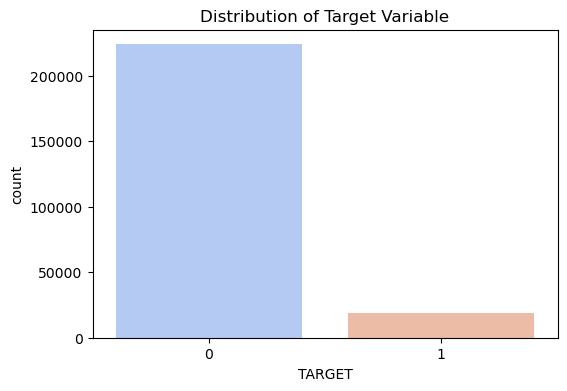

In [20]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x="TARGET", data=df, palette="coolwarm")
plt.title("Distribution of Target Variable")
plt.show()

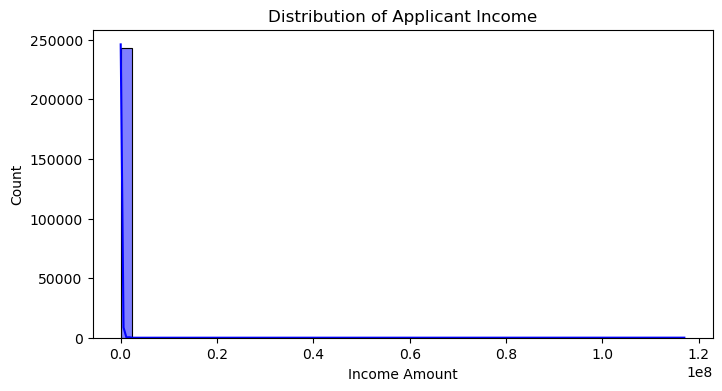

In [21]:
# Distribution of income amount
plt.figure(figsize=(8, 4))
sns.histplot(df["AMT_INCOME_TOTAL"].dropna(), bins=50, kde=True, color="blue")
plt.title("Distribution of Applicant Income")
plt.xlabel("Income Amount")
plt.show()

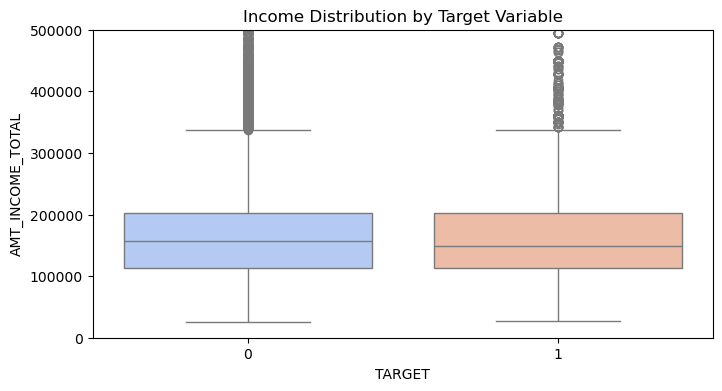

In [22]:
# Boxplot of Income vs Target
plt.figure(figsize=(8, 4))
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=df, palette="coolwarm")
plt.title("Income Distribution by Target Variable")
plt.ylim([0, 500000])  # Truncate outliers for better visualization
plt.show()


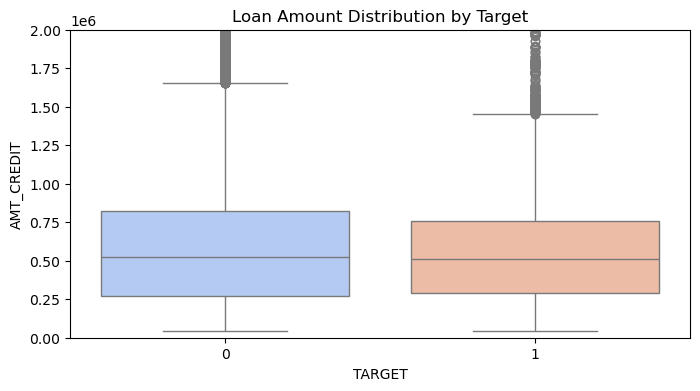

In [23]:
# Loan Amount vs Target
plt.figure(figsize=(8, 4))
sns.boxplot(x="TARGET", y="AMT_CREDIT", data=df, palette="coolwarm")
plt.title("Loan Amount Distribution by Target")
plt.ylim([0, 2e6])  # Truncate outliers for better visualization
plt.show()

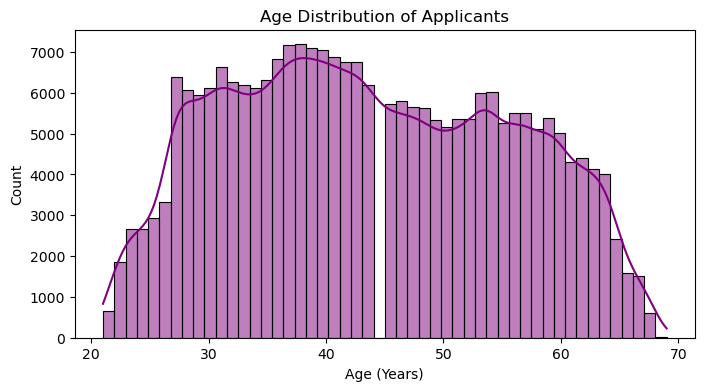

In [24]:
# Age Distribution
df["DAYS_BIRTH_YEARS"] = df["DAYS_BIRTH"] // -365  # Convert to years
plt.figure(figsize=(8, 4))
sns.histplot(df["DAYS_BIRTH_YEARS"], bins=50, kde=True, color="purple")
plt.title("Age Distribution of Applicants")
plt.xlabel("Age (Years)")
plt.show()


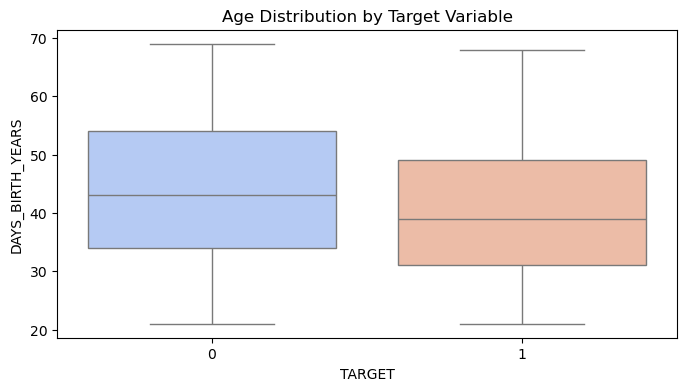

In [25]:
# Age vs Target
plt.figure(figsize=(8, 4))
sns.boxplot(x="TARGET", y="DAYS_BIRTH_YEARS", data=df, palette="coolwarm")
plt.title("Age Distribution by Target Variable")
plt.show()

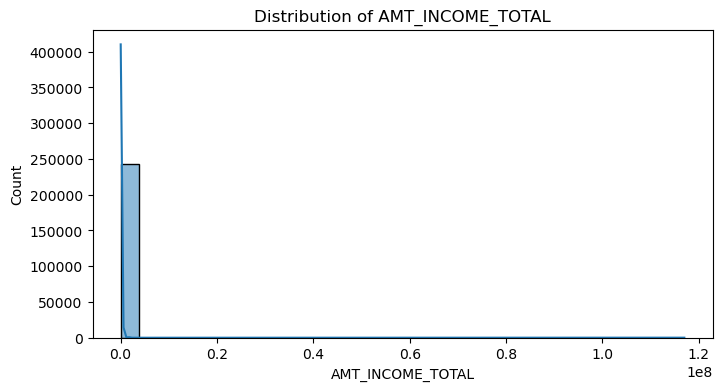

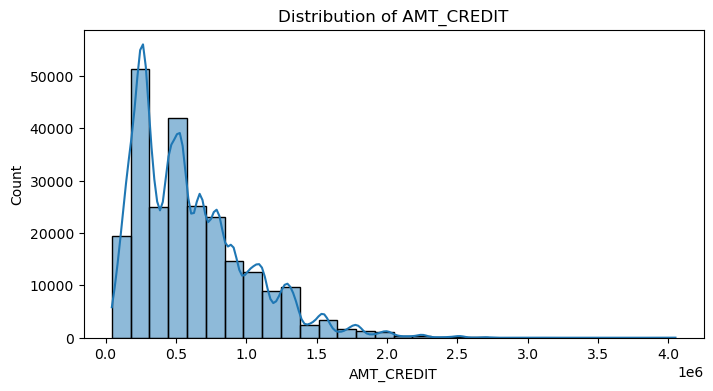

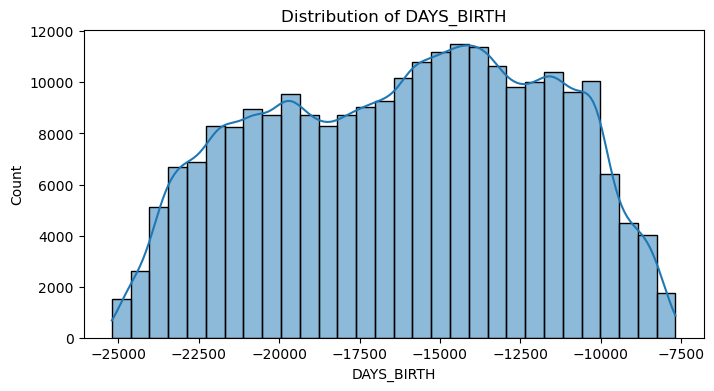

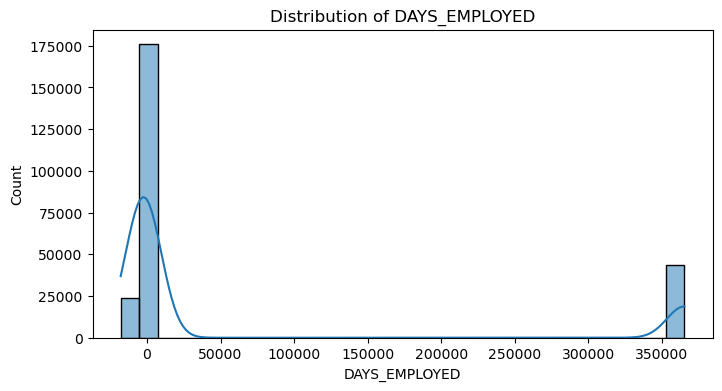

In [26]:
# Distribution of key numerical features
num_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


In [27]:
# Feature Engineering: Creating new feature 'AGE'
df['AGE'] = abs(df['DAYS_BIRTH']) // 365

#### Encode Categorical Variables

In [28]:
# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'CREDIT_CURRENCY_<lambda>'],
      dtype='object')


In [29]:
# Apply one-hot encoding to the dataset
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True,dtype='int')

In [30]:
df_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,CREDIT_CURRENCY_<lambda>_currency 2
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
2,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,0,0,0,0
3,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0,0,0,0,0,0
4,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Verify the shape of the new dataset
print("Dataset Shape After Encoding:", df_encoded.shape)

Dataset Shape After Encoding: (242953, 158)


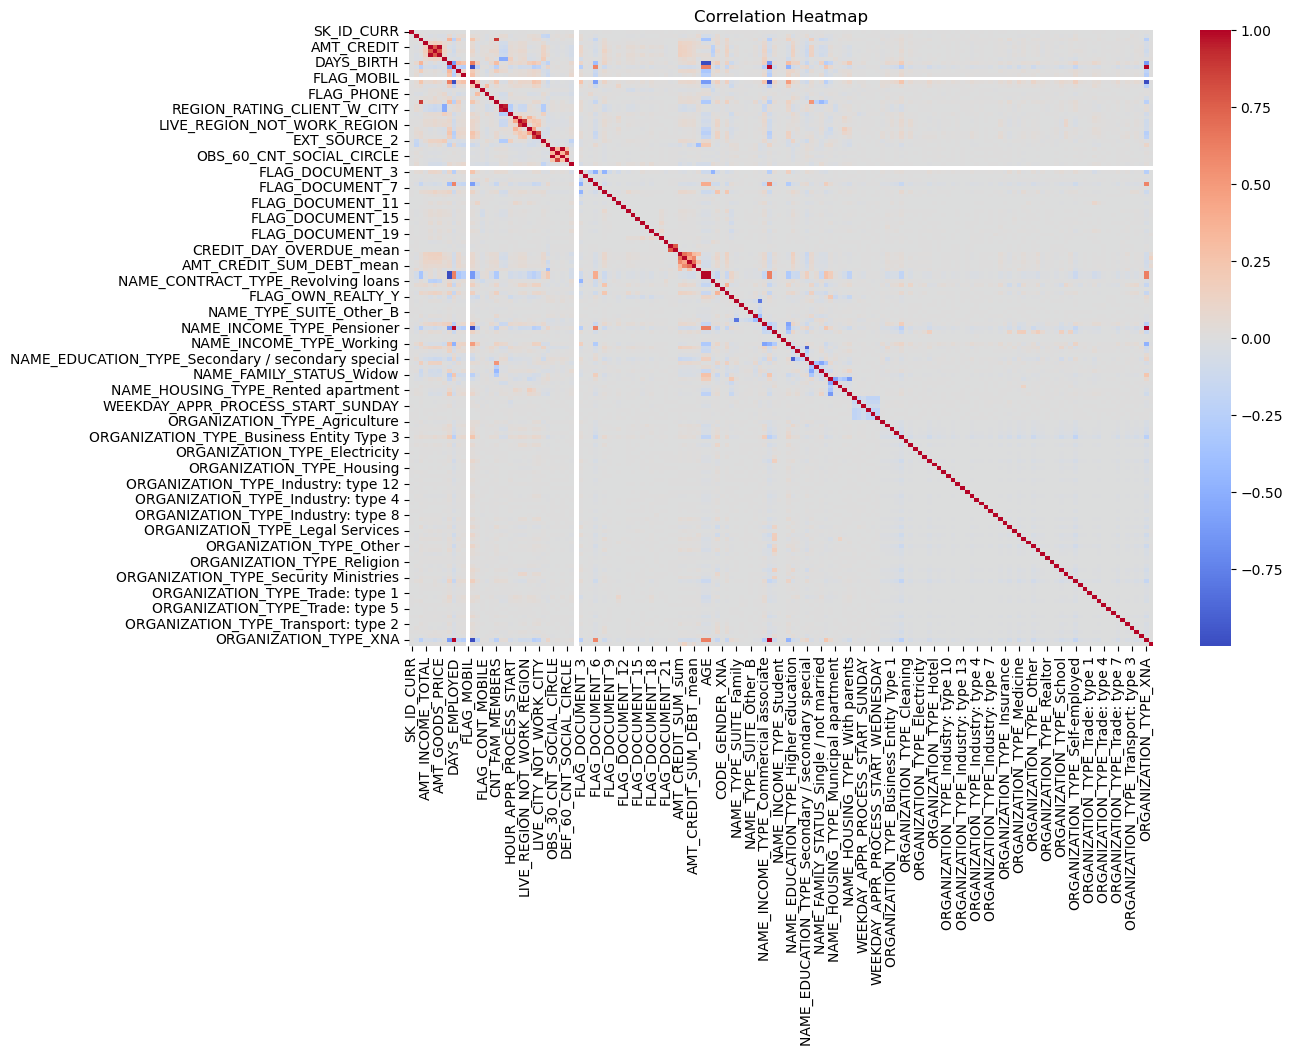

In [32]:
#correlation plot
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

## Step 4 - Feature scaling and Selection

#### Split Data into Train and Test Sets

In [33]:
# Splitting data into features and target
X = df_encoded.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df_encoded['TARGET']


In [34]:
# Handling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [35]:
# Feature Selection using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression(random_state=42)
rfe_selector = RFE(estimator=logreg, n_features_to_select=20)
X_resampled_selected = rfe_selector.fit_transform(X_resampled, y_resampled)
X_test_selected = rfe_selector.transform(X)
selected_features = X.columns[rfe_selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'CREDIT_DAY_OVERDUE_max',
       'CREDIT_DAY_OVERDUE_mean', 'AMT_CREDIT_SUM_sum', 'AMT_CREDIT_SUM_mean',
       'AMT_CREDIT_SUM_DEBT_sum', 'AMT_CREDIT_SUM_DEBT_mean',
       'DAYS_BIRTH_YEARS', 'AGE', 'FLAG_OWN_CAR_Y',
       'NAME_EDUCATION_TYPE_Higher education', 'NAME_FAMILY_STATUS_Married'],
      dtype='object')


In [36]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_selected, y_resampled, test_size=0.2, random_state=42)


In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 5 - Model Training & Evaluation


#### Logistic regression

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [38]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

**Performance on trest set**


In [42]:
y_pred_logreg = logreg.predict(X_test_scaled)

In [43]:
accuracy_score(y_test, y_pred_logreg)

0.7895899828136509

In [44]:
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     44729
           1       0.79      0.79      0.79     44877

    accuracy                           0.79     89606
   macro avg       0.79      0.79      0.79     89606
weighted avg       0.79      0.79      0.79     89606



In [45]:
from sklearn.metrics import  roc_auc_score, roc_curve
print("Logistic Regression AUC-ROC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]))


Logistic Regression AUC-ROC Score: 0.8743189378244309


### Using Decision Tree


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [48]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8135281119567886


In [50]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     44729
           1       0.80      0.84      0.82     44877

    accuracy                           0.81     89606
   macro avg       0.81      0.81      0.81     89606
weighted avg       0.81      0.81      0.81     89606



In [51]:
print("Decision Tree AUC-ROC Score:", roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1]))


Decision Tree AUC-ROC Score: 0.8134920097300511


### Using RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [53]:
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9014574916858246


In [54]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     44729
           1       0.90      0.90      0.90     44877

    accuracy                           0.90     89606
   macro avg       0.90      0.90      0.90     89606
weighted avg       0.90      0.90      0.90     89606



In [55]:
print("Random Forest AUC-ROC Score:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]))


Random Forest AUC-ROC Score: 0.9600462764239329


In [56]:
# Model Evaluation
models = {'Logistic Regression': logreg, 'Decision Tree': dt, 'Random Forest': rf}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} AUC-ROC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     44729
           1       0.79      0.79      0.79     44877

    accuracy                           0.79     89606
   macro avg       0.79      0.79      0.79     89606
weighted avg       0.79      0.79      0.79     89606

Logistic Regression AUC-ROC Score: 0.8743189378244309
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     44729
           1       0.80      0.84      0.82     44877

    accuracy                           0.81     89606
   macro avg       0.81      0.81      0.81     89606
weighted avg       0.81      0.81      0.81     89606

Decision Tree AUC-ROC Score: 0.8134920097300511
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     44729
           1      

#### Plotting ROC Curves for Initial Models

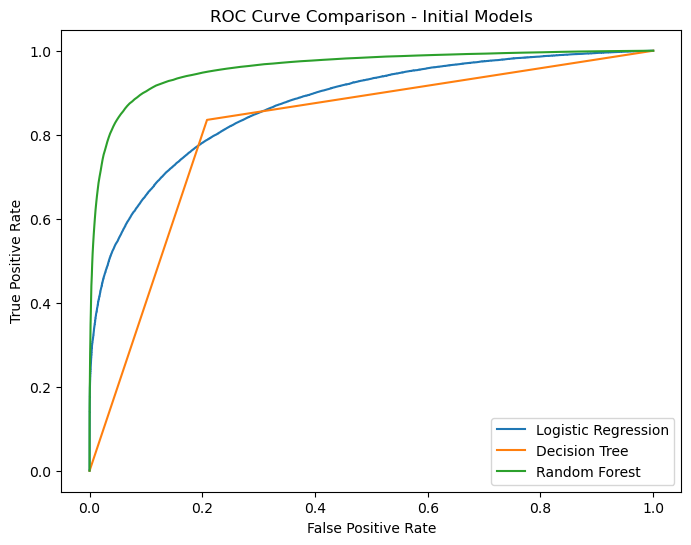

In [57]:
# Plot ROC Curves for Initial Models
plt.figure(figsize=(8, 6))
for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    plt.plot(fpr, tpr, label=name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Initial Models")
plt.legend()
plt.show()

## Step 6 - Hyperparameter tuning and Model Performance Comparision

In [58]:
from sklearn.model_selection import  GridSearchCV

#### tuning Logreg


In [59]:
param_grid_logreg = {'C': [0.01, 0.1, 1, 10, 100]}
logreg_cv = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_logreg, cv=5)
logreg_cv.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [60]:
y_pred_logreg_tuned = logreg_cv.best_estimator_.predict(X_test_scaled)
print("Best Logistic Regression Parameters:", logreg_cv.best_params_)


Best Logistic Regression Parameters: {'C': 0.1}


#### tuning Decision Tree

In [61]:
param_grid_dt = {'max_depth': [5, 10, 15, 20]}
dt_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
dt_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20]})

In [62]:
y_pred_dt_tuned = dt_cv.best_estimator_.predict(X_test_scaled)
print("Best Decision Tree Parameters:", dt_cv.best_params_)

Best Decision Tree Parameters: {'max_depth': 20}


#### tuning Random Forest


In [63]:
from sklearn.model_selection import RandomizedSearchCV
param_dist_rf = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
rf_cv = RandomizedSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), 
                           param_distributions=param_dist_rf, 
                           cv=3, n_iter=5, random_state=42)
rf_cv.fit(X_train_scaled, y_train)


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [5, 10],
                                        'n_estimators': [50, 100]},
                   random_state=42)

In [64]:
y_pred_rf_tuned = rf_cv.best_estimator_.predict(X_test_scaled)
print("Best Random Forest Parameters:", rf_cv.best_params_)

Best Random Forest Parameters: {'n_estimators': 50, 'max_depth': 10}


#### Retraining Models with Best Parameters


In [65]:
best_logreg = logreg_cv.best_estimator_
best_dt = dt_cv.best_estimator_
best_rf = rf_cv.best_estimator_

In [66]:
models_tuned = {'Logistic Regression': best_logreg, 'Decision Tree': best_dt, 'Random Forest': best_rf}
for name, model in models_tuned.items():
    y_pred = model.predict(X_test_scaled)
    print(f"{name} (Tuned) Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} (Tuned) AUC-ROC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))


Logistic Regression (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     44729
           1       0.79      0.79      0.79     44877

    accuracy                           0.79     89606
   macro avg       0.79      0.79      0.79     89606
weighted avg       0.79      0.79      0.79     89606

Logistic Regression (Tuned) AUC-ROC Score: 0.8733737707593394
Decision Tree (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     44729
           1       0.79      0.84      0.81     44877

    accuracy                           0.81     89606
   macro avg       0.81      0.81      0.81     89606
weighted avg       0.81      0.81      0.81     89606

Decision Tree (Tuned) AUC-ROC Score: 0.8339938020219487
Random Forest (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.7

#### Plotting ROC Curves for Tuned Models

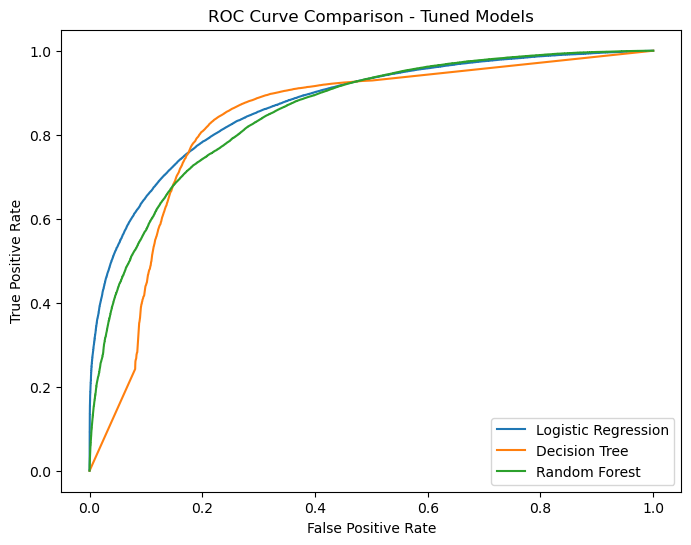

In [67]:
plt.figure(figsize=(8, 6))
for name, model in models_tuned.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    plt.plot(fpr, tpr, label=name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Tuned Models")
plt.legend()
plt.show()


In [68]:
# Selecting the Best Model
best_model = max(models_tuned.items(), key=lambda x: roc_auc_score(y_test, x[1].predict_proba(X_test_scaled)[:, 1]))[1]
print("Best Model Selected:", best_model)

Best Model Selected: LogisticRegression(C=0.1, max_iter=1000, random_state=42)


In [69]:
# Selecting the Best Model
best_model = max(models_tuned.items(), key=lambda x: roc_auc_score(y_test, x[1].predict_proba(X_test_scaled)[:, 1]))[1]
print("Best Model Selected:", best_model)

Best Model Selected: LogisticRegression(C=0.1, max_iter=1000, random_state=42)


In [70]:
results = {}
for name, model in models_tuned.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    results[name] = auc

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

In [73]:
# Extracting Important Features
if hasattr(best_model, 'coef_'):
    feature_importance = abs(best_model.coef_[0])
elif hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
else:
    raise ValueError("Error: Feature importance could not be extracted.")


In [74]:

feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

## Step 7 - Business Insigths and Recommendation

In [75]:
# Business Insights
print("Top 10 Important Features for Credit Risk Prediction:")
print(feature_importance_df.head(10))

Top 10 Important Features for Credit Risk Prediction:
                                 Feature  Importance
4                             DAYS_BIRTH   37.449154
16                                   AGE   18.968390
15                      DAYS_BIRTH_YEARS   18.968390
3                        AMT_GOODS_PRICE    1.088271
1                             AMT_CREDIT    0.973114
18  NAME_EDUCATION_TYPE_Higher education    0.667146
17                        FLAG_OWN_CAR_Y    0.474418
19            NAME_FAMILY_STATUS_Married    0.414546
12                   AMT_CREDIT_SUM_mean    0.331594
11                    AMT_CREDIT_SUM_sum    0.234053


### Some plots displaying various results 

#### Feature Importance plot

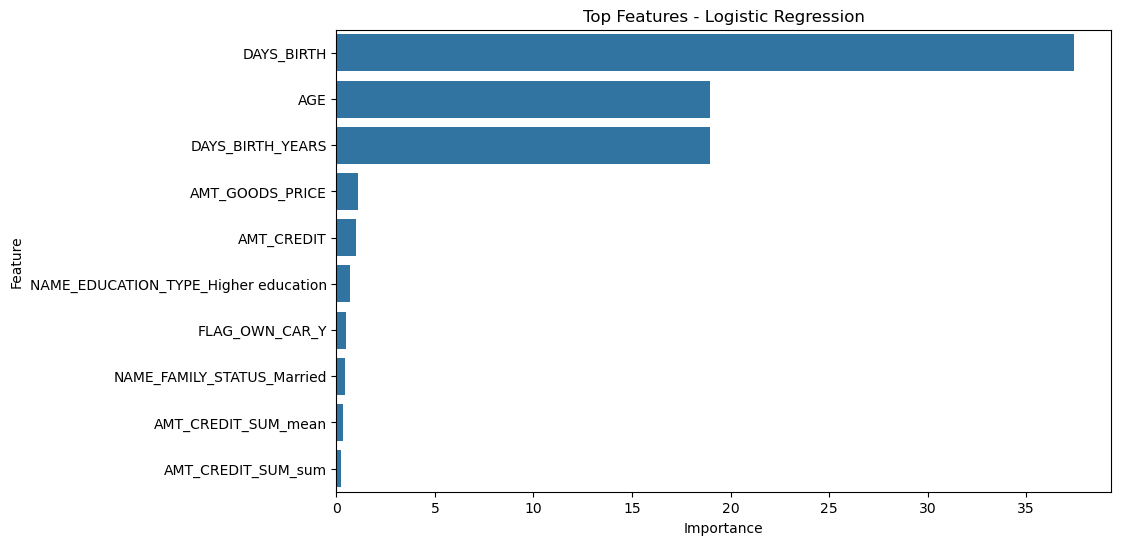

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'][:10], y=feature_importance_df['Feature'][:10])
plt.title(f'Top Features - {best_model_name}')
plt.show()

#### Distribution of Target Variable (Credit Default)

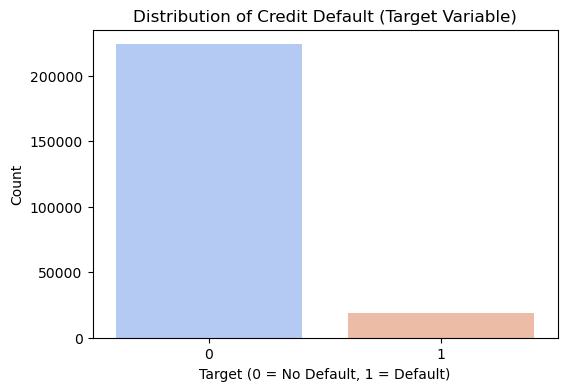

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='coolwarm')
plt.title("Distribution of Credit Default (Target Variable)")
plt.xlabel("Target (0 = No Default, 1 = Default)")
plt.ylabel("Count")
plt.show()


A simple bar chart to show the class imbalance in the dataset.


#### Age vs. Default Rate

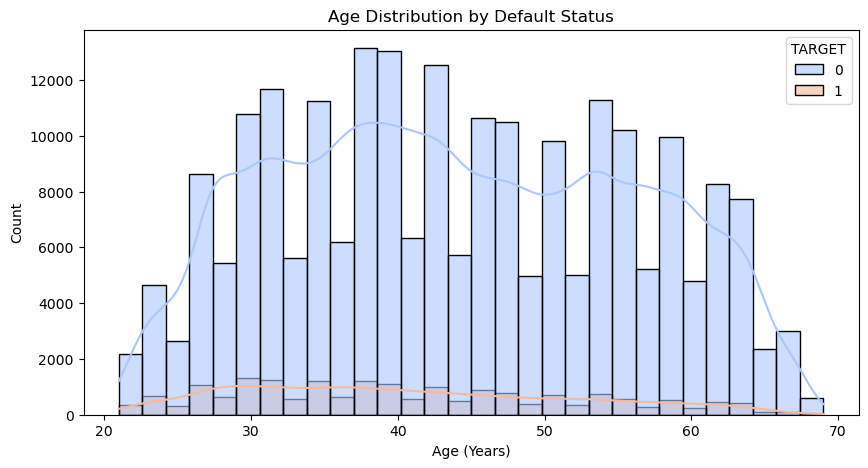

In [78]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['AGE'], hue=df['TARGET'], bins=30, kde=True, palette='coolwarm', alpha=0.6)
plt.title("Age Distribution by Default Status")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.show()


-DAYS_BIRTH, AGE, and DAYS_BIRTH_YEARS have the highest importance, suggesting that older individuals may have different risk profiles compared to younger ones.
-Younger applicants may have a higher risk due to lower financial stability, less credit history, or higher spending habits.


#### Loan Amount vs. Default Probability

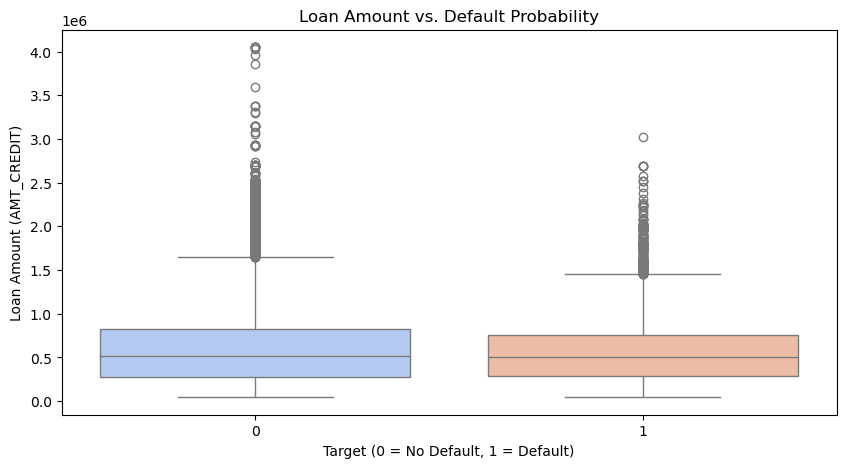

In [79]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TARGET'], y=df['AMT_CREDIT'], palette="coolwarm")
plt.title("Loan Amount vs. Default Probability")
plt.xlabel("Target (0 = No Default, 1 = Default)")
plt.ylabel("Loan Amount (AMT_CREDIT)")
plt.show()


#### Credit Amount vs. Income (Correlation Plot)

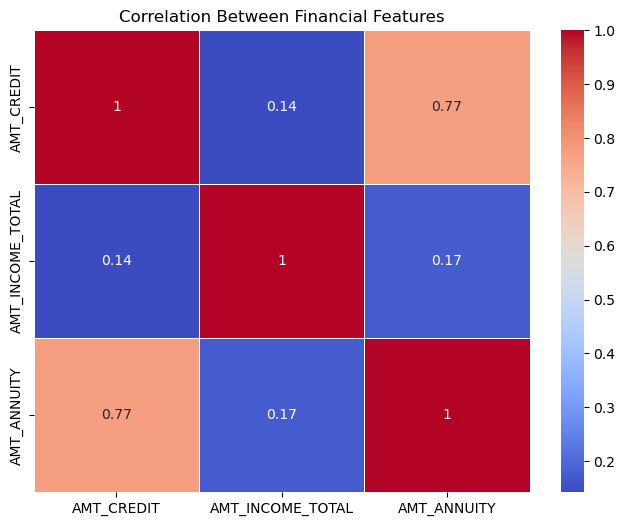

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Financial Features")
plt.show()


A heatmap to visualize correlations between key financial variables like AMT_CREDIT, AMT_INCOME_TOTAL, and AMT_ANNUITY.

In [81]:
# Conclusion
print(f"Best Model: {best_model_name} with AUC-ROC Score: {results[best_model_name]:.4f}")

Best Model: Logistic Regression with AUC-ROC Score: 0.8734
